# A Cost of Living and Salary Analysis

## Introduction

As a future data scientist or business analyst, choosing the right city to live in can significantly impact your purchasing power and overall quality of life. With salaries varying widely across different locations and the cost of living fluctuating just as dramatically, it's crucial to analyze where your salary can stretch the furthest. 

In this article, I will compare cost-of-living indices across various global cities to identify the top five locations where a data scientist or business analyst salary will offer the highest purchasing power. This analysis used data from the 'cost_of_living.csv' and 'Levels_Fyi_Salary_Data.csv' datasets to provide a comprehensive overview supported by statistical analysis and visualizations. The datasets can be found in my GitHub.

## Data Import and Prepration

First, I will import the necessary libraries and datasets. 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Cost of Living Data
cost_of_living_df = pd.read_csv('cost_of_living.csv')
clean_cost_of_living_df = cost_of_living_df.drop(columns=['Rank'])


# Import Salary data
ds_salaries_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

# Select columns from the salaries dataframe
select_ds_salary_columns = ds_salaries_df[['title', 'basesalary']]

# Filter for Data Scientist and Business Analyst roles
selected_titles = select_ds_salary_columns[
    select_ds_salary_columns['title'].isin(['Data Scientist', 'Business Analyst'])
]


## Salary Analysis

To understand where the salary can go the furthest, I first calculated the average salary for Data Scientist and Business Analyst roles.

In [52]:
# Calculate average salary
avg_selected_titles = selected_titles['basesalary'].mean()
print('The average salary for either a Data Scientist or Business Analyst role is:', 
      round(avg_selected_titles, 2))

The average salary for either a Data Scientist or Business Analyst role is: 129225.24


## Cost of Living Analysis

Next, I visualized the distribution of various cost-of-living indices and determined the median values.

Indices to be looked at:
1. Cost of Living
2. Rent
3. Cost of Living Plus Rent
4. Groceries
5. Restaurant Price
6. Local Purchasing Power

I plotted histograms for each index to provide an overview of the distribution.

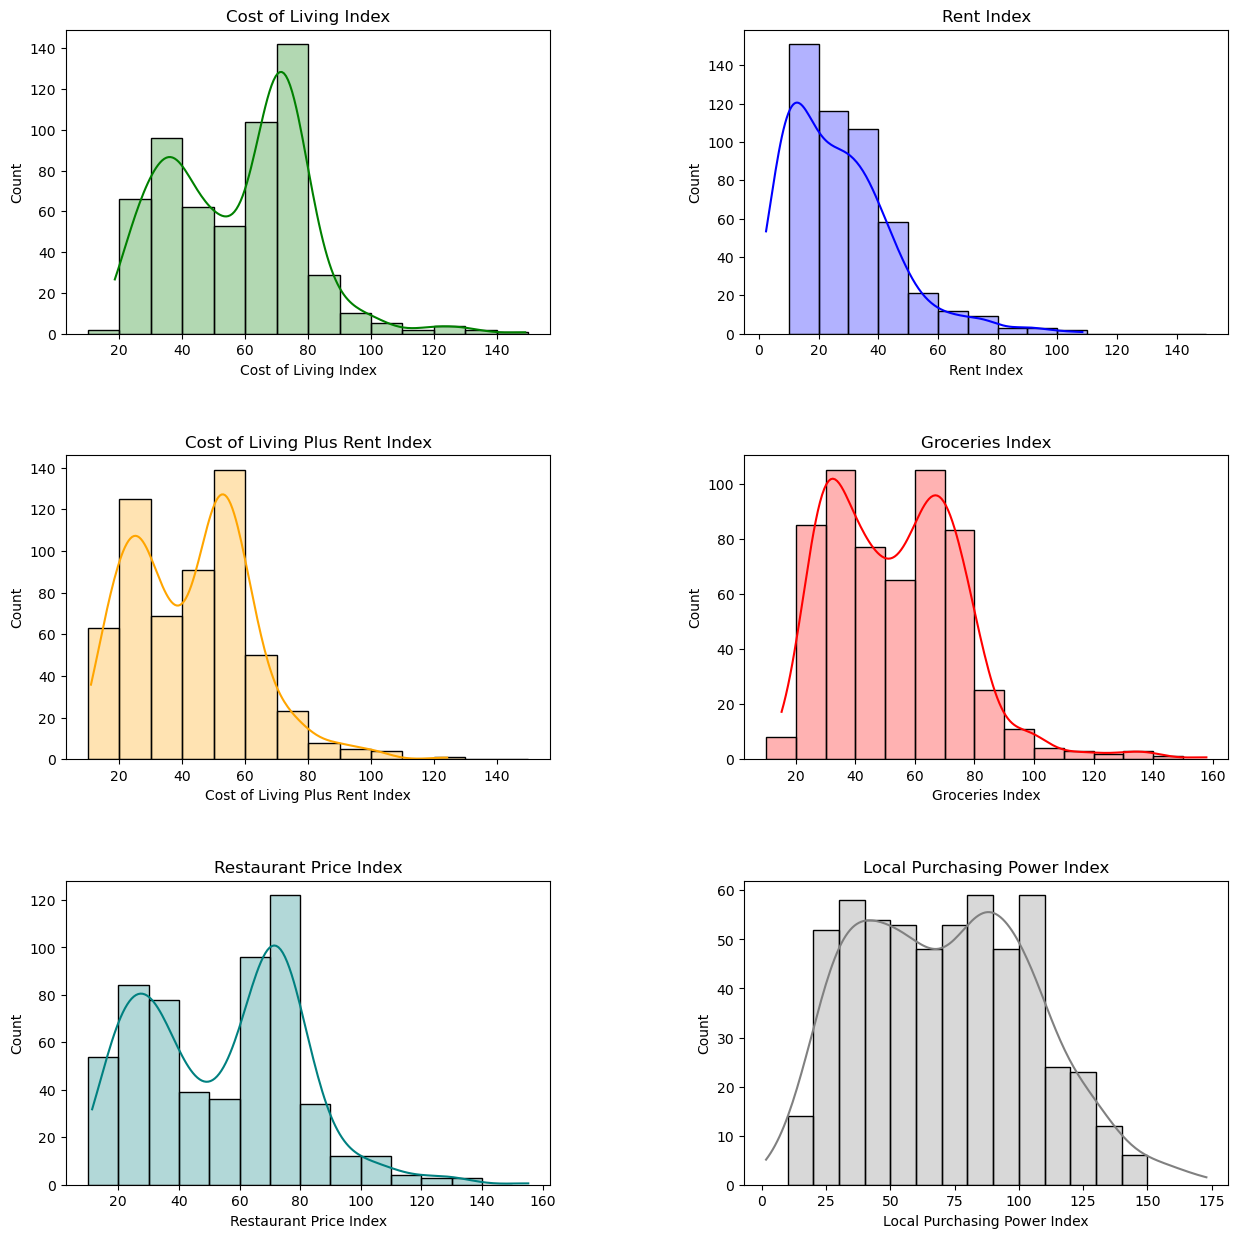

In [22]:
# Plot histograms for each index
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Histogram bins
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

indices = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 
           'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
colors = ['green', 'blue', 'orange', 'red', 'teal', 'grey']
titles = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 
          'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']

for i, ax in enumerate(axs.flatten()):
    sns.histplot(clean_cost_of_living_df[indices[i]], bins=bins, 
        color=colors[i], alpha=0.3, edgecolor='black', kde=True, ax=ax)
    ax.set_title(titles[i])

plt.show()

This visual provides an overview of the distribution of each index helping identify median values.

## Median Values and Required Salaries

For each index, I calculated the median value and the corresponding required salary.

In [27]:
def calculate_median_and_required_salary(index_name):
    median_value = clean_cost_of_living_df[index_name].median()
    amount = (median_value / 100) * avg_selected_titles
    return median_value, round(amount, 2)

# Cost of Living Index
median_col, salary_col = calculate_median_and_required_salary('Cost of Living Index')
print('The median for the Cost of Living Index is:', median_col)
print('The salary required for a comfortable standard of living:', salary_col)

# Rent Index
median_rent, salary_rent = calculate_median_and_required_salary('Rent Index')
print('The median for the Rent Index is:', median_rent)
print('The salary required for a comfortable standard of living:', salary_rent)

# Cost of Living Plus Rent Index
median_col_rent, salary_col_rent = calculate_median_and_required_salary('Cost of Living Plus Rent Index')
print('The median for the Cost of Living Plus Rent Index is:', median_col_rent)
print('The salary required for a comfortable standard of living:', salary_col_rent)

# Groceries Index
median_groceries, salary_groceries = calculate_median_and_required_salary('Groceries Index')
print('The median for the Groceries Index is:', median_groceries)
print('The salary required for a comfortable standard of living:', salary_groceries)

# Restaurant Price Index
median_restaurant, salary_restaurant = calculate_median_and_required_salary('Restaurant Price Index')
print('The median for the Restaurant Price Index is:', median_restaurant)
print('The salary required for a comfortable standard of living:', salary_restaurant)

# Local Purchasing Power Index
median_purchase, salary_purchase = calculate_median_and_required_salary('Local Purchasing Power Index')
print('The median for the Local Purchasing Power Index is:', median_purchase)
print('The salary required for a comfortable standard of living:', salary_purchase)

The median for the Cost of Living Index is: 62.405
The salary required for a comfortable standard of living: 80643.01
The median for the Rent Index is: 23.28
The salary required for a comfortable standard of living: 30083.64
The median for the Cost of Living Plus Rent Index is: 44.99
The salary required for a comfortable standard of living: 58138.43
The median for the Groceries Index is: 52.735
The salary required for a comfortable standard of living: 68146.93
The median for the Restaurant Price Index is: 59.135
The salary required for a comfortable standard of living: 76417.34
The median for the Local Purchasing Power Index is: 70.935
The salary required for a comfortable standard of living: 91665.92


## Visualization of Cities Around Median Values

For each index, I visualized the cities around the median values.

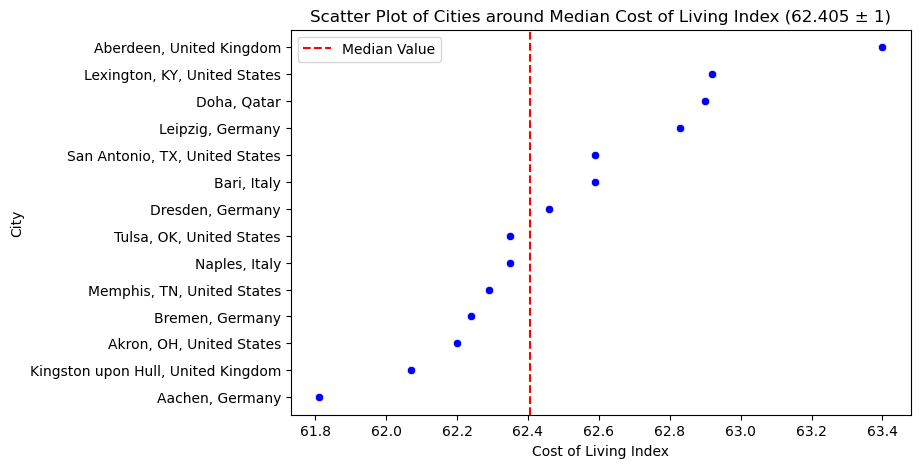

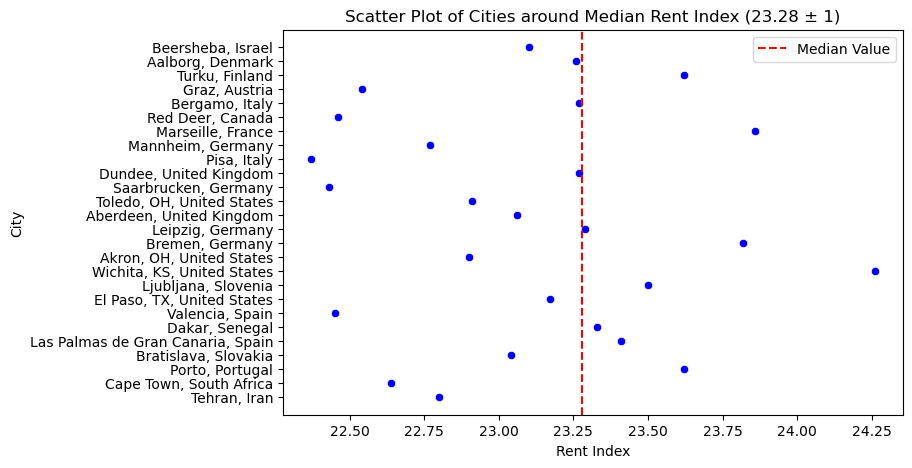

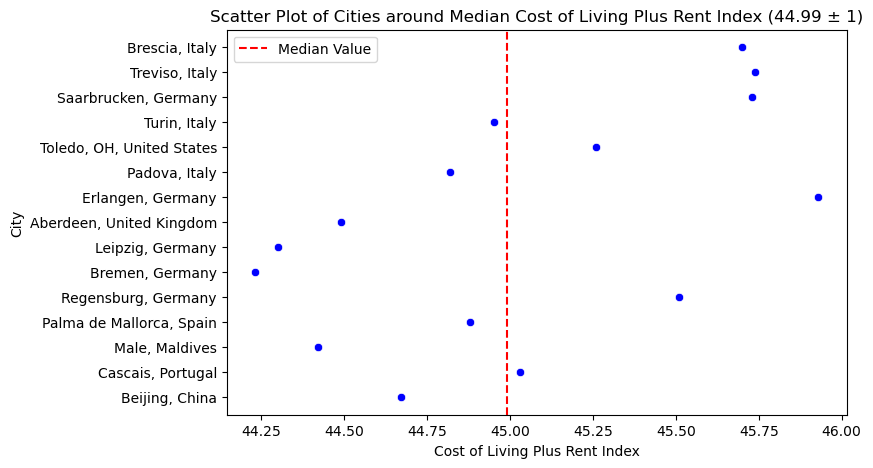

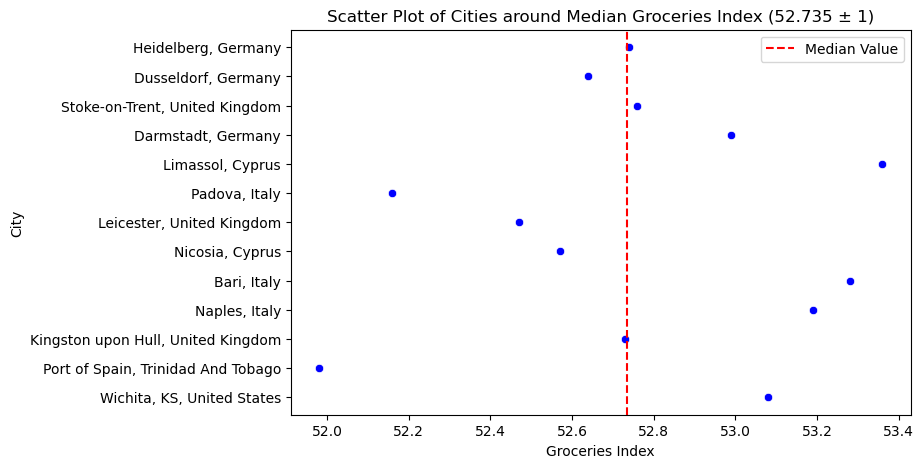

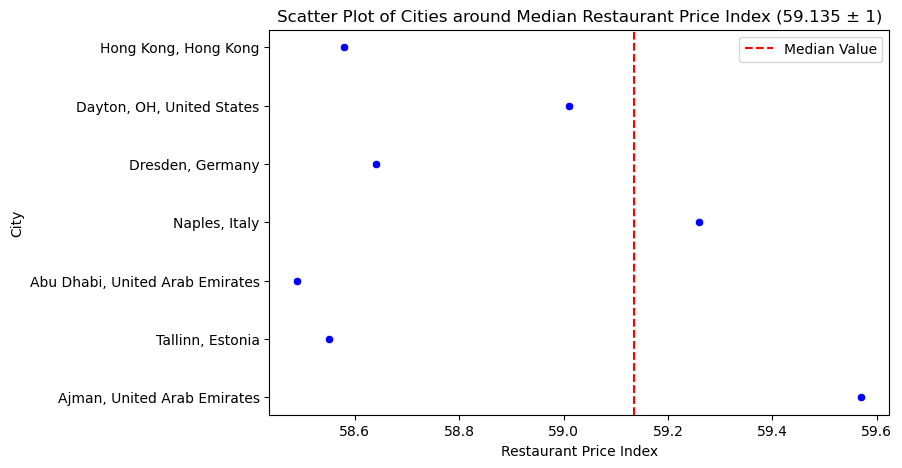

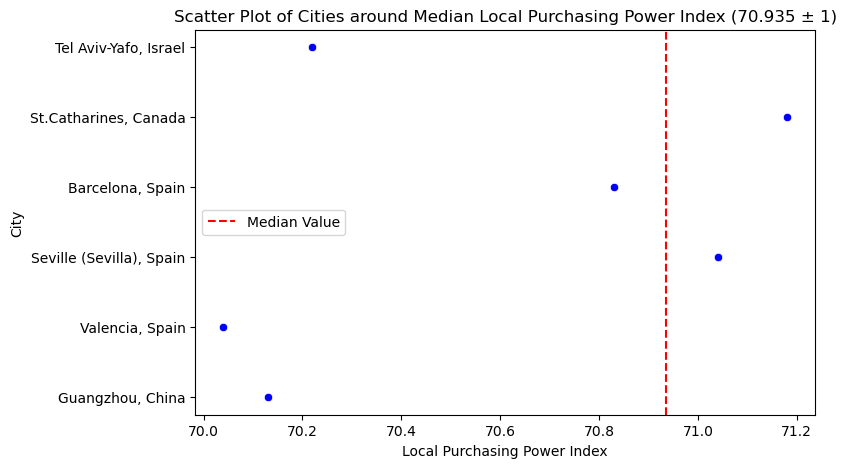

In [58]:
def plot_median_cities(index_name, median_value, tolerance = 1):
    median_city_df = clean_cost_of_living_df.loc[
        (clean_cost_of_living_df[index_name] >= median_value - tolerance) &
        (clean_cost_of_living_df[index_name] <= median_value + tolerance),
        ['City', index_name]
    ]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=index_name, y = 'City', data = median_city_df, 
      color = 'blue')
    plt.axvline(x = median_value, color = 'red', linestyle = '--',
     label = 'Median Value')
    plt.title(f'Scatter Plot of Cities around Median {index_name} ({median_value} ± {tolerance})')
    plt.legend()
    plt.show()

# Cost of Living Index
plot_median_cities('Cost of Living Index', median_col)

# Rent Index
plot_median_cities('Rent Index', median_rent)

# Cost of Living Plus Rent Index
plot_median_cities('Cost of Living Plus Rent Index', median_col_rent)

# Groceries Index
plot_median_cities('Groceries Index', median_groceries)

# Restaurant Price Index
plot_median_cities('Restaurant Price Index', median_restaurant)

# Local Purchasing Power Index
plot_median_cities('Local Purchasing Power Index', median_purchase)

## Summary of Findings

Based on my analysis, I summarized the best cities based on the median values for each index.

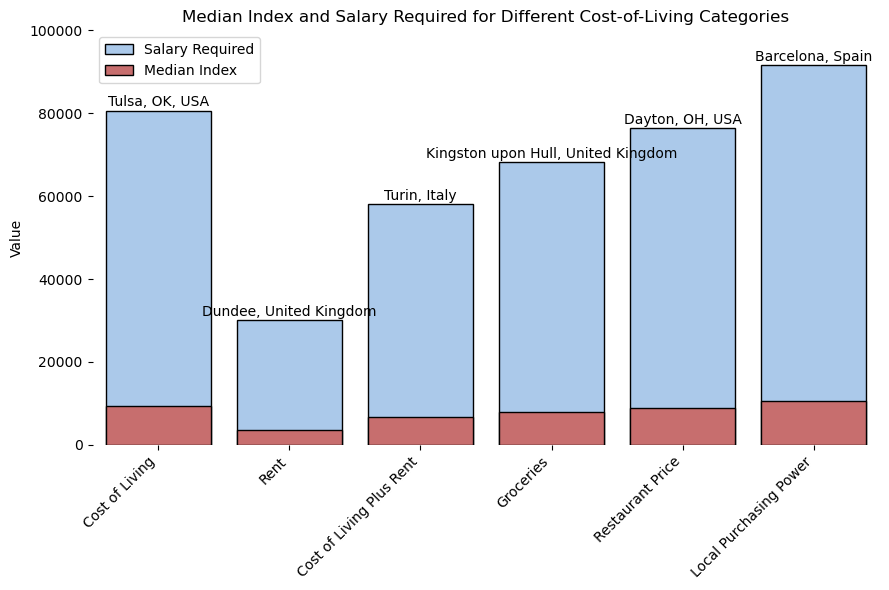

In [61]:
# Summary DataFrame
best_cities_df = {
    'Category': ['Cost of Living', 'Rent', 'Cost of Living Plus Rent', 
                 'Groceries', 'Restaurant Price', 'Local Purchasing Power'],
    'Median Index': [median_col, median_rent, median_col_rent, 
                     median_groceries, median_restaurant, median_purchase],
    'Salary Required': [salary_col, salary_rent, salary_col_rent, 
                        salary_groceries, salary_restaurant, salary_purchase],
    'Best City': ['Tulsa, OK, USA', 'Dundee, United Kingdom', 'Turin, Italy', 
                  'Kingston upon Hull, United Kingdom', 'Dayton, OH, USA', 'Barcelona, Spain']
}

median_data_df = pd.DataFrame(best_cities_df)

# Bar plot for the summary
scaling_factor = 150
median_data_df['Median Index'] = median_data_df['Median Index'] * scaling_factor
f, ax = plt.subplots(figsize=(9, 6))

# Plot Salary Required
sns.set_color_codes("pastel")
sns.barplot(x = "Category", y = "Salary Required", data = median_data_df, 
            label = "Salary Required", color = "b", edgecolor = "black")

# Plot Median Index
sns.set_color_codes("muted")
sns.barplot(x = "Category", y = "Median Index", data = median_data_df, 
            label = "Median Index", color = "r", edgecolor = "black")

# Labels and titles
ax.set_ylabel('Value')
ax.set_title('Median Index and Salary Required for Different Cost-of-Living Categories')
ax.legend(ncol = 1, loc = "best", frameon = True)
ax.set(ylim = (0, 100000), xlabel = "")
sns.despine(left = True, bottom = True)
for index, row in median_data_df.iterrows():
    ax.text(index, row['Salary Required'] + 1000, row['Best City'], ha = 'center')

plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## Conclusion

Based on my analysis, the top cities where my salary will have the highest purchasing power across various indices are:
- Cost of Living Index: Tulsa, OK, USA
- Rent Index: Dundee, United Kingdom
- Cost of Living Plus Rent Index: Turin, Italy
- Groceries Index: Kingston upon Hull, United Kingdom
- Restaurant Price Index: Dayton, OH, USA
- Local Purchasing Power Index: Barcelona, Spain

These cities offer the best options for maximizing purchasing power and standard of living, considering the average salary for Data Scientist and Business Analyst roles. If I were to select a single city based on the presented data, Dundee, United Kingdom, would be my preferred choice based on the Rent Index.